In [32]:
import math as math
# Load libraries
import random
from itertools import batched
import sympy as sp

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fontTools.misc.timeTools import epoch_diff

In [33]:
# Read data
data = np.loadtxt('data/ex2data1.txt', delimiter=',')
np.random.shuffle(data)
X = data[:, :-1]
Y = data[:, -1, np.newaxis]
print(X.shape, Y.shape)
print(data)

(100, 2) (100, 1)
[[62.0730638  96.76882412  1.        ]
 [55.48216114 35.57070347  0.        ]
 [42.26170081 87.10385094  1.        ]
 [66.74671857 60.99139403  1.        ]
 [38.7858038  64.99568096  0.        ]
 [74.78925296 41.57341523  0.        ]
 [40.23689374 71.16774802  0.        ]
 [97.77159928 86.72782233  1.        ]
 [72.34649423 96.22759297  1.        ]
 [77.19303493 70.4582      1.        ]
 [89.84580671 45.35828361  1.        ]
 [79.03273605 75.34437644  1.        ]
 [34.52451385 60.39634246  0.        ]
 [83.90239366 56.30804622  1.        ]
 [30.05882245 49.59297387  0.        ]
 [82.30705337 76.4819633   1.        ]
 [60.45555629 42.50840944  0.        ]
 [34.21206098 44.2095286   0.        ]
 [74.24869137 69.82457123  1.        ]
 [60.18259939 86.3085521   1.        ]
 [61.83020602 50.25610789  0.        ]
 [42.07545454 78.844786    0.        ]
 [40.45755098 97.53518549  1.        ]
 [76.0987867  87.42056972  1.        ]
 [94.09433113 77.15910509  1.        ]
 [49.07

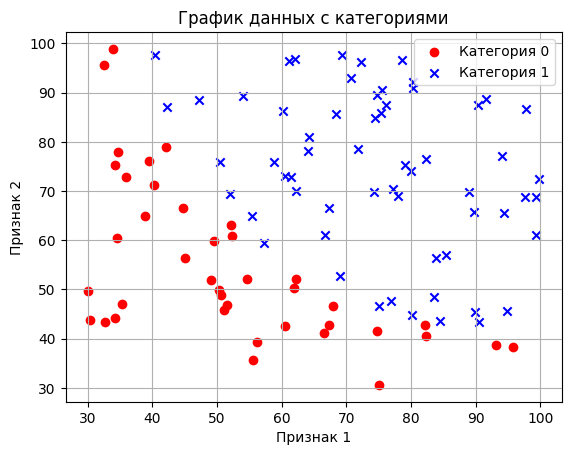

In [34]:
def plot_data(data):
    x1 = data[:, 0]
    x2 = data[:, 1]
    y = data[:, 2]

    #plt.figure(figsize=(8,6))
    plt.scatter(x1[y == 0], x2[y == 0], color='red', label='Категория 0', marker='o')
    plt.scatter(x1[y == 1], x2[y == 1], color='blue', label='Категория 1', marker='x')

    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    plt.title('График данных с категориями')
    plt.legend()
    plt.grid(True)
    plt.show()


plot_data(data)



In [35]:
# Standardize data
def standardize_data(data):
    means = np.mean(data, axis=0)
    stds = np.std(data, axis=0)
    return (data - means) / stds


X_standard = standardize_data(X)

In [36]:
# Split data
def split_data(x_data, y_data):
    train_size = int(x_data.shape[0] * 0.5)
    x_train, x_validate = x_data[:train_size], x_data[train_size:]
    y_train, y_validate = y_data[:train_size], y_data[train_size:]
    return x_train, y_train, x_validate, y_validate


# Add x0
ones_column = np.ones((X_standard.shape[0], 1))
X_with_ones = np.hstack((ones_column, X_standard))
X_train, y_train, X_validate, y_validate = split_data(X_with_ones, Y)
print(X_train.shape, y_train.shape)
print(X_train)

(50, 3) (50, 1)
[[ 1.         -0.1844568   1.65210535]
 [ 1.         -0.52488391 -1.65775547]
 [ 1.         -1.2077347   1.12938152]
 [ 1.          0.05694243 -0.28289384]
 [ 1.         -1.38726847 -0.06632457]
 [ 1.          0.47234786 -1.33310268]
 [ 1.         -1.31231814  0.26748769]
 [ 1.          1.65941042  1.10904426]
 [ 1.          0.34617678  1.62283321]
 [ 1.          0.59650575  0.22911224]
 [ 1.          1.25003483 -1.12840052]
 [ 1.          0.69152826  0.49337794]
 [ 1.         -1.60736862 -0.31507682]
 [ 1.          0.94305124 -0.53618968]
 [ 1.         -1.83802631 -0.89937003]
 [ 1.          0.86065022  0.55490359]
 [ 1.         -0.26800277 -1.28253412]
 [ 1.         -1.62350714 -1.19053019]
 [ 1.          0.44442728  0.19484284]
 [ 1.         -0.28210129  1.0863683 ]
 [ 1.         -0.19700066 -0.86350486]
 [ 1.         -1.21735452  0.68269533]
 [ 1.         -1.30092096  1.69355351]
 [ 1.          0.53998666  1.14651105]
 [ 1.          1.46947562  0.59152637]
 [ 1.    

In [42]:
def draw_errors(train_error_array, validate_error_array, alpha):
    epochs = np.arange(1, len(train_error_array) + 1)

    # Линия для train_error (сплошная линия)
    plt.plot(epochs, train_error_array, label='Train Error', color='blue', linewidth=2)

    # Линия для validate_error (пунктирная линия)
    plt.plot(epochs, validate_error_array, label='Validation Error', color='red', linewidth=2)

    # Настройка графика
    plt.title(f'График ошибки с коэффициентом обучения {round(alpha, 8)}')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()

    # Отображение графика
    plt.grid(True)
    plt.show()


def plot_data_with_function(data, teta, line_function):
    x1 = data[:, 0]
    x2 = data[:, 1]
    y = data[:, 2]

    try:
        x1S, x2S, expr = line_function(teta)
        x1_vals = np.linspace(min(x1), max(x1), 100)
        x2_vals = np.array([float(expr[0].subs(x1S, x_val)) for x_val in x1_vals])
        plt.plot(x1_vals, x2_vals, color='green', label='Линейная функция')
    except:
        print("Не получилось построить график функции")
        return

    #plt.figure(figsize=(8,6))
    plt.scatter(x1[y == 0], x2[y == 0], color='red', label='Категория 0', marker='o')
    plt.scatter(x1[y == 1], x2[y == 1], color='blue', label='Категория 1', marker='x')


    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    plt.title('График данных с категориями')
    plt.legend()
    plt.grid(True)
    plt.show()


def calculate_h(teta, x_matrix):
    v = x_matrix @ (teta.T)
    sigmoid = 1 / (1 + (math.e ** (-v)))
    return sigmoid


def calculate_teta_shift(h_array, x_matrix, y_array, spead: float):
    return spead * ((h_array - y_array).T @ x_matrix) / x_matrix.shape[0]


def calculate_error(x_matrix, y_array, teta):
    #return ((y_array - calculate_h(teta, x_matrix)) ** 2).sum() / x_matrix.shape[0]
    h = calculate_h(teta, x_matrix)
    one_column = np.ones((x_matrix.shape[0], 1))
    j = (y_array - one_column) * np.log(one_column - h) - y_array * np.log(h)
    return j.sum() / x_matrix.shape[0]


def learn_model(x_train_matrix, y_train_array, x_validate_matrix, y_validate_array, start_teta, epoch, learn,
                batch_size):
    teta = start_teta.copy()
    train_error_array = []
    validate_error_array = []
    data_size = x_train_matrix.shape[0]
    for i in range(epoch):
        # shuffled data
        shuffled_indices = np.random.permutation(data_size)
        x_matrix_shuffled = x_train_matrix[shuffled_indices]
        y_array_shuffled = y_train_array[shuffled_indices]

        # calculate teta shift by minibatch
        for start_batch_index in range(0, data_size, batch_size):
            x_batch = x_matrix_shuffled[start_batch_index:min(start_batch_index + batch_size, data_size)]
            y_batch = y_array_shuffled[start_batch_index:min(start_batch_index + batch_size, data_size)]
            h_array = calculate_h(teta, x_batch)
            teta = teta - calculate_teta_shift(h_array, x_batch, y_batch, learn)

        train_error = calculate_error(x_train_matrix, y_train_array, teta)
        validate_error = calculate_error(x_validate_matrix, y_validate_array, teta)
        #print("train error: ", train_error, " validation error: ", validate_error)
        train_error_array.append(train_error)
        validate_error_array.append(validate_error)

    return teta, train_error_array, validate_error_array


def learn_model_with_any_superparameters(x_train, y_train, x_validate, y_validated, line_function):
    epoch_values = np.linspace(500, 5000, 3)
    learn_coefficients = np.linspace(0.01, 0.001, 2)
    # epoch_values = [400]
    # learn_coefficients = [0.01]
    for epoch in epoch_values:
        for learn_cof in learn_coefficients:
            start_teta = (np.random.randint(-12, 12, size=X_train.shape[1]))[np.newaxis, :]
            teta, train_error, validate_error = learn_model(x_train, y_train, x_validate, y_validated, start_teta,
                                                            int(epoch), learn_cof, 8)
            plot_data_with_function(data, teta[0], line_function)
            draw_errors(train_error, validate_error, learn_cof)
            print("Train error:", train_error[-1], "Validate error:", validate_error[-1])

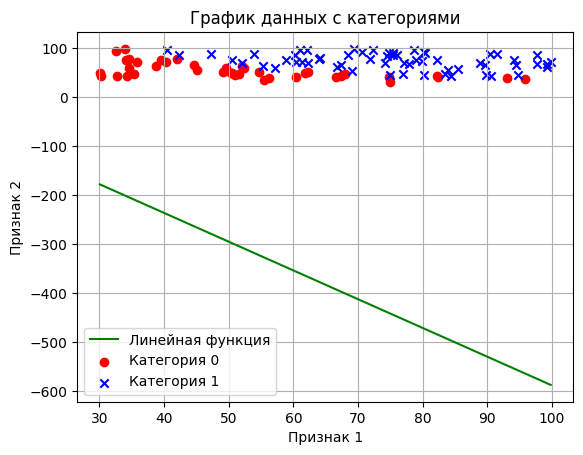

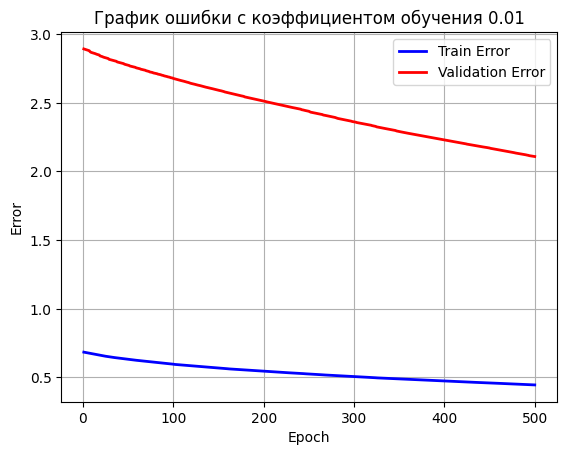

Train error: 0.44387946670144274 Validate error: 2.10773939360028


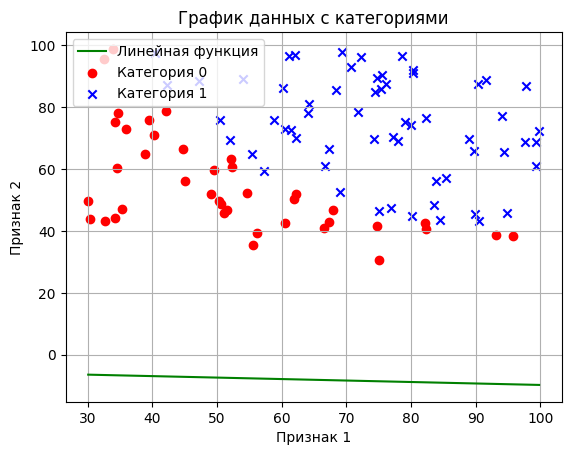

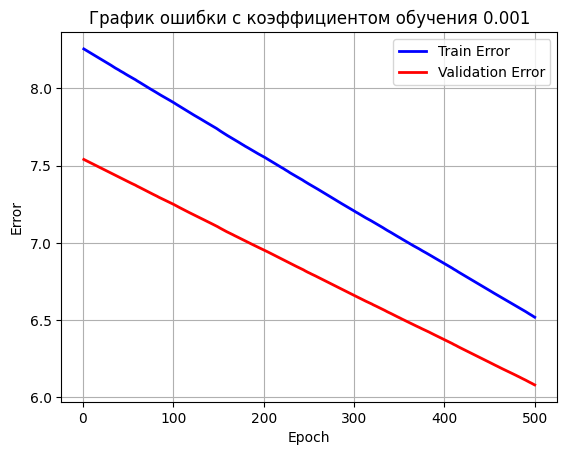

Train error: 6.518144532799239 Validate error: 6.079869186821152


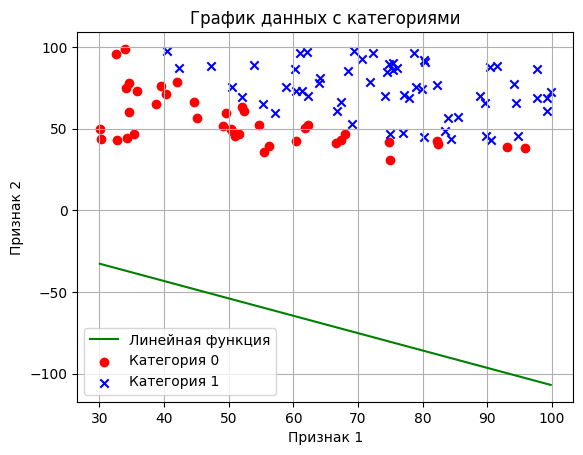

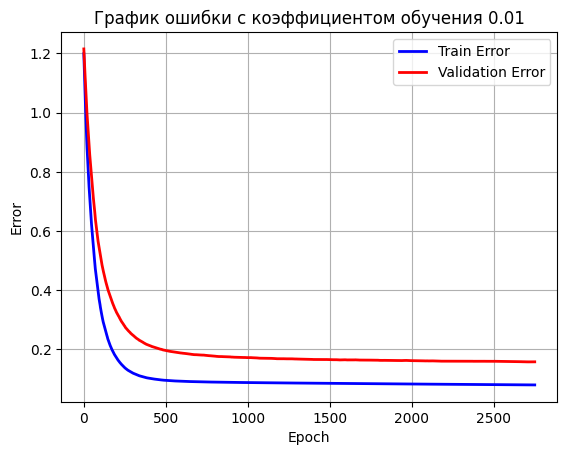

Train error: 0.07946964348426837 Validate error: 0.15753704461053425


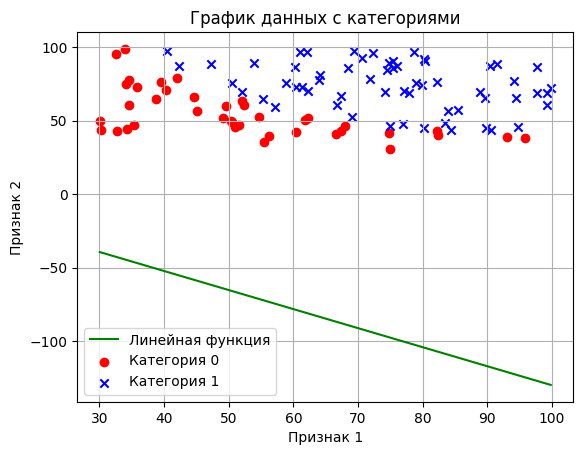

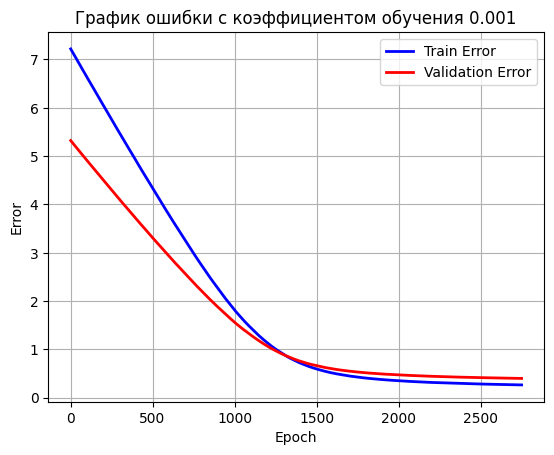

Train error: 0.260572396414425 Validate error: 0.39509029528559203


/tmp/ipykernel_49286/991057831.py:62: RuntimeWarning: divide by zero encountered in log
  j = (y_array - one_column) * np.log(one_column - h) - y_array * np.log(h)


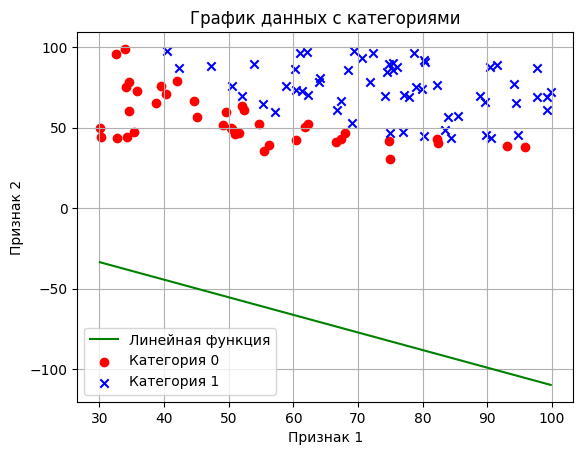

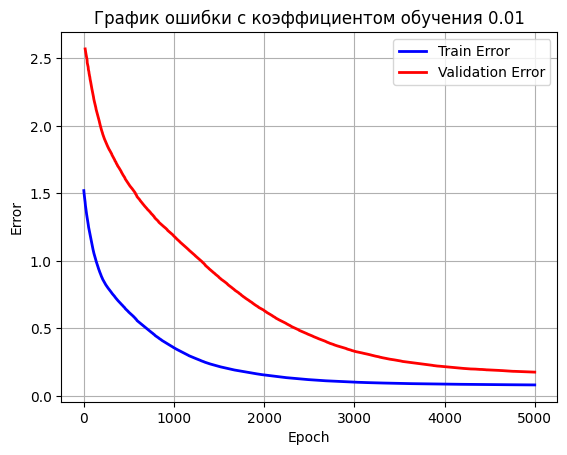

Train error: 0.0815881003158704 Validate error: 0.1763015875901049


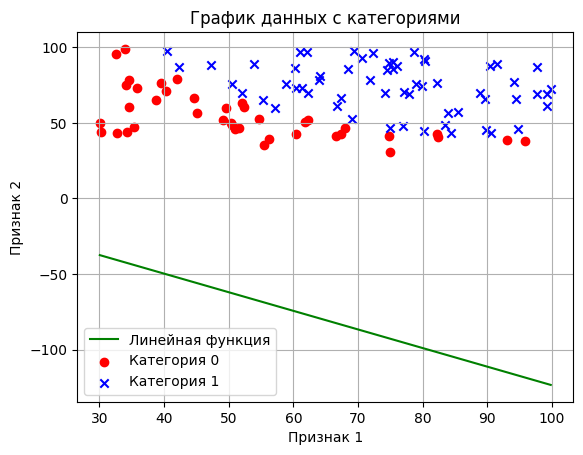

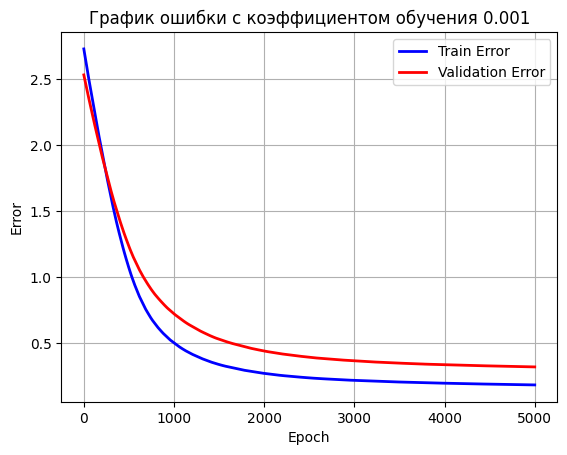

Train error: 0.18443382435773767 Validate error: 0.3206207536219879


In [45]:
def calc1(t):
    x1, x2 = sp.symbols('x1 x2')
    expression = t[0] + t[1] * x1 + t[2] * x2
    expr = sp.solve(expression, x2)
    return x1,x2,expr

learn_model_with_any_superparameters(X_train, y_train, X_validate, y_validate, calc1)

Добавим столбцы с расчётными значениями:
* x1 ^2

(100, 4) (100, 1)


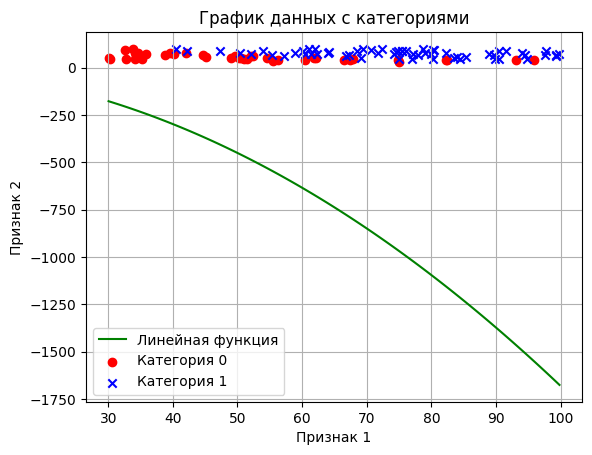

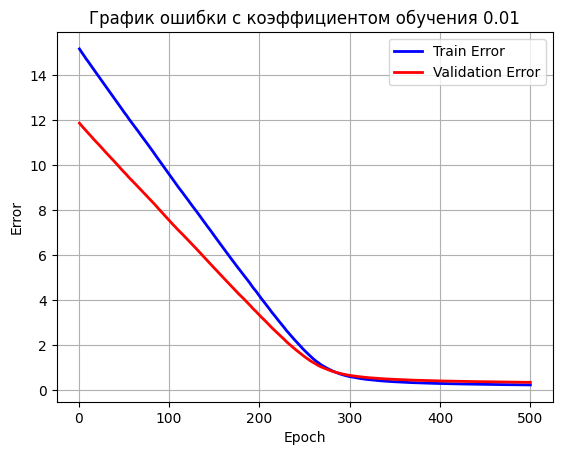

Train error: 0.2345829612492218 Validate error: 0.3491022165882842


/tmp/ipykernel_49286/991057831.py:62: RuntimeWarning: divide by zero encountered in log
  j = (y_array - one_column) * np.log(one_column - h) - y_array * np.log(h)


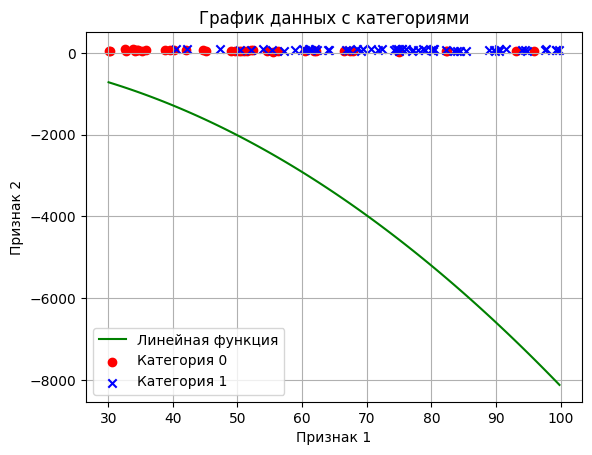

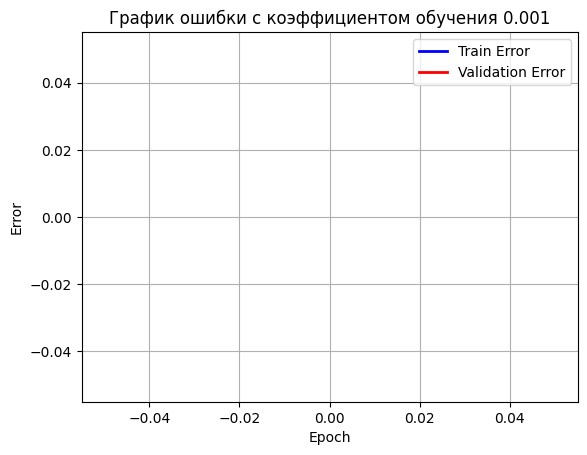

Train error: inf Validate error: inf


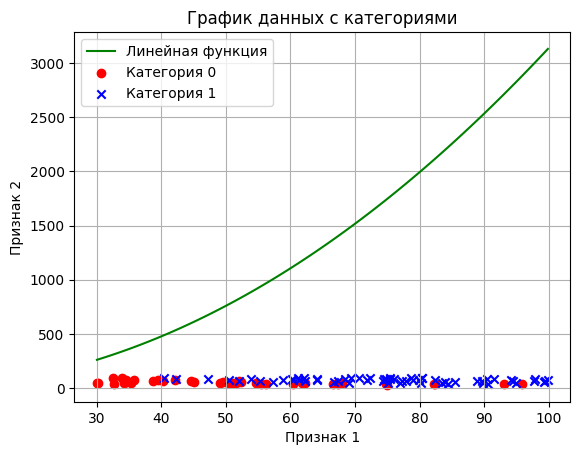

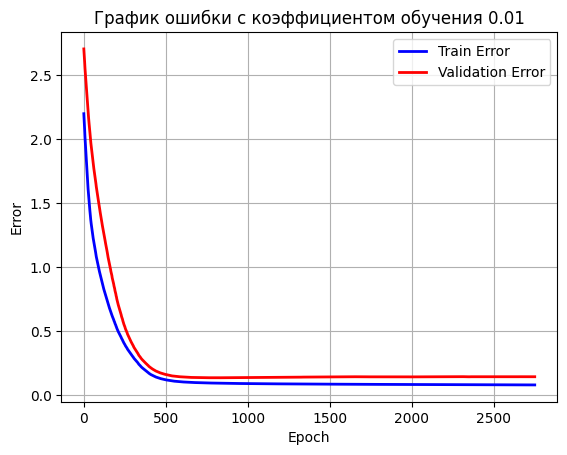

Train error: 0.07748105768491652 Validate error: 0.14132883716042022


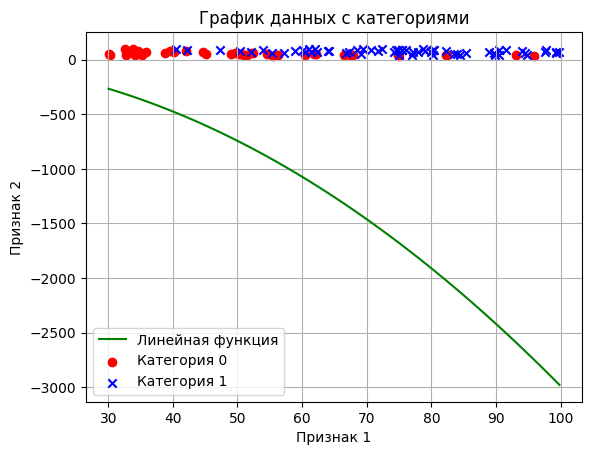

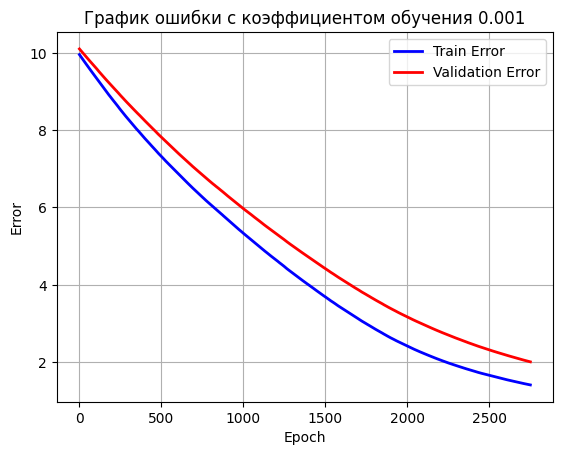

Train error: 1.418632457531426 Validate error: 2.0146000260495005


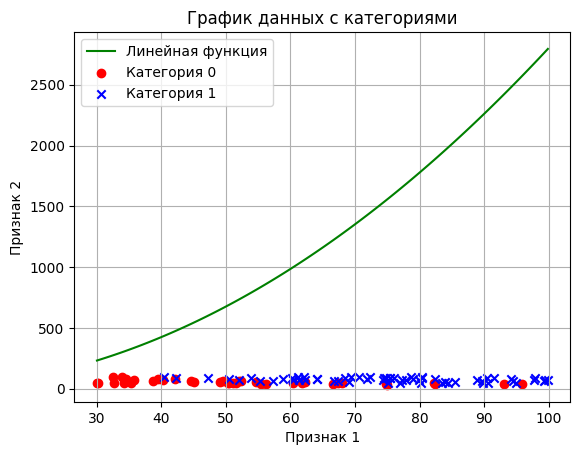

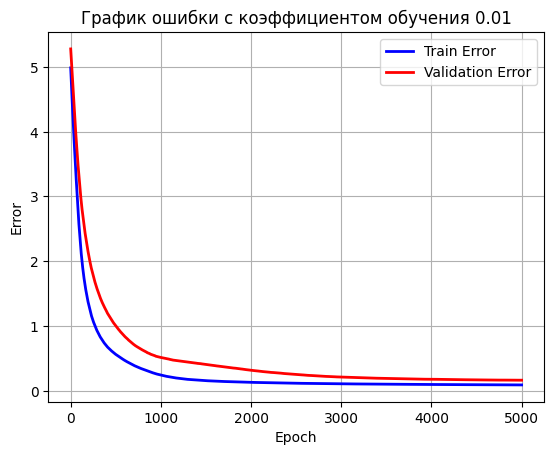

Train error: 0.08789004377119321 Validate error: 0.16098613913724827


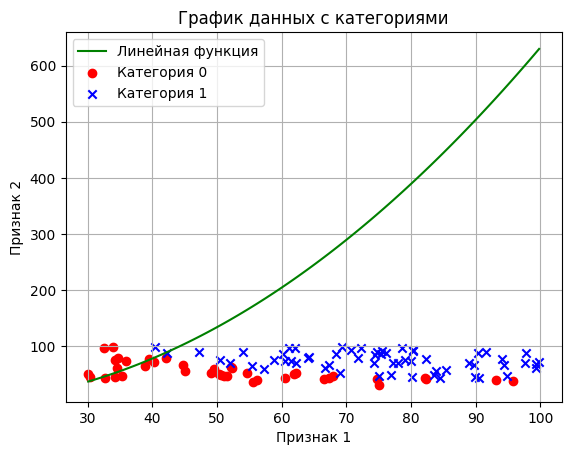

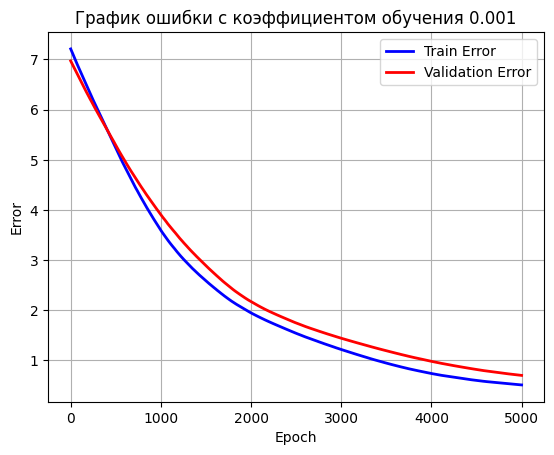

Train error: 0.5078481281609026 Validate error: 0.6979651799936577


In [51]:
X_extended = X_with_ones.copy()
X_extended = np.hstack((X_extended, (X_with_ones[:, 1] **2)[:, np.newaxis]))

print(X_extended.shape, Y.shape)
X_train, y_train, X_validate, y_validate = split_data(X_extended, Y)

def calc2(t):
    x1, x2 = sp.symbols('x1 x2')
    expression = t[0] + t[1] * x1 + t[2] * x2 + t[3] * (x1 ** 2)
    expr = sp.solve(expression, x2)
    return x1,x2,expr


learn_model_with_any_superparameters(X_train, y_train, X_validate, y_validate, calc2)

Добавим столбцы с расчётными значениями:
* x1^2
* x2^2

(100, 5) (100, 1)
Не получилось построить график функции


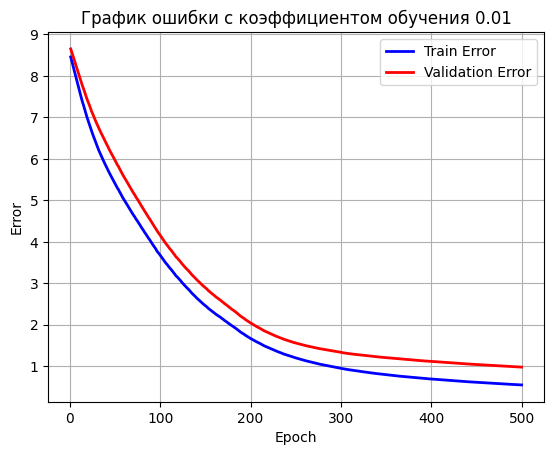

Train error: 0.543524177650666 Validate error: 0.9730362333711107


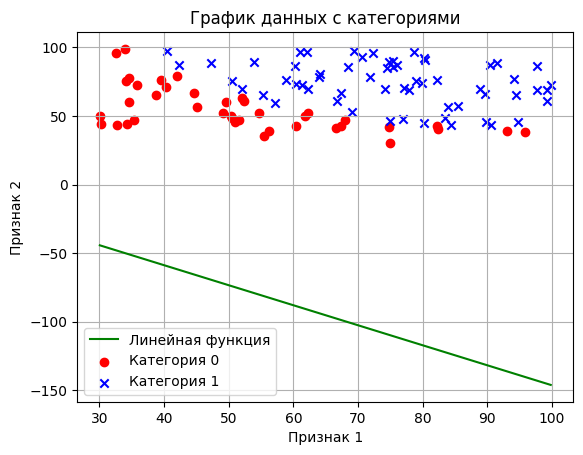

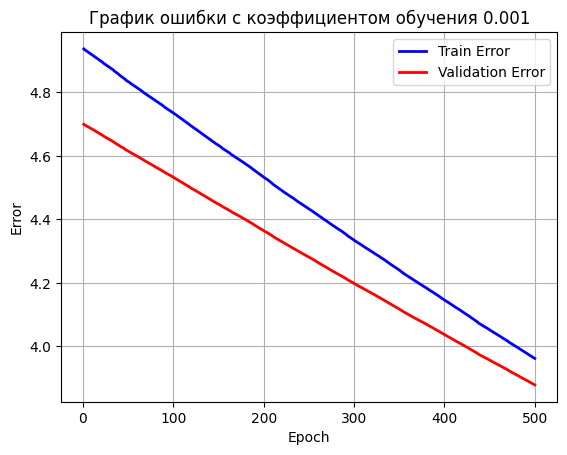

Train error: 3.9620886113519367 Validate error: 3.8787743794159657


/tmp/ipykernel_49286/991057831.py:62: RuntimeWarning: divide by zero encountered in log
  j = (y_array - one_column) * np.log(one_column - h) - y_array * np.log(h)
/tmp/ipykernel_49286/991057831.py:62: RuntimeWarning: invalid value encountered in multiply
  j = (y_array - one_column) * np.log(one_column - h) - y_array * np.log(h)


Не получилось построить график функции


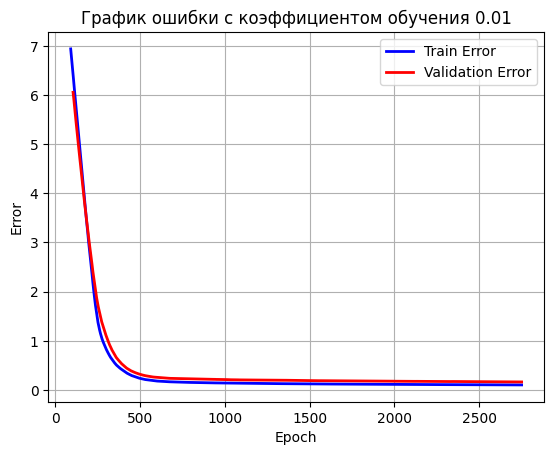

Train error: 0.09701150413561957 Validate error: 0.15776824156468325
Не получилось построить график функции


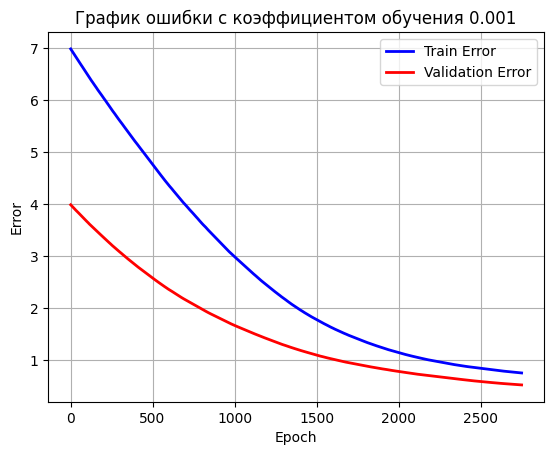

Train error: 0.7485952264177709 Validate error: 0.5181828862227408
Не получилось построить график функции


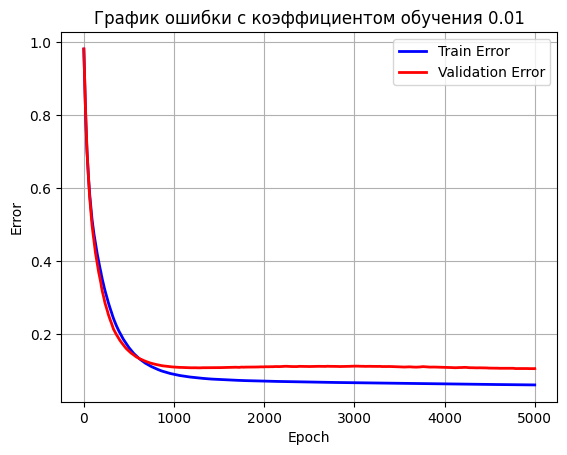

Train error: 0.06127587676417381 Validate error: 0.10588927246134963


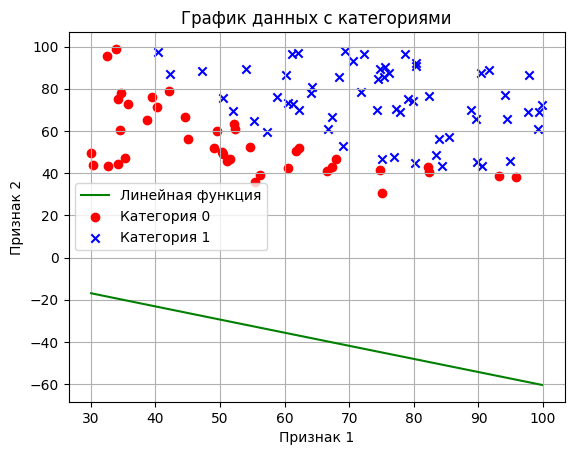

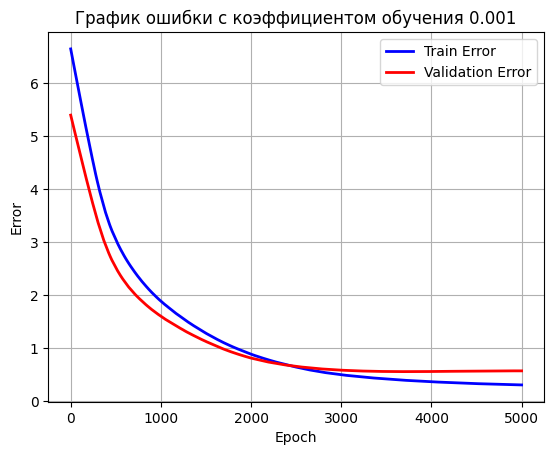

Train error: 0.3048123729497364 Validate error: 0.5701543184067015


In [41]:
X_extended = X_with_ones.copy()
X_extended = np.hstack((X_extended, (X_with_ones[:, 1] ** 2)[:, np.newaxis]))
X_extended = np.hstack((X_extended, (X_with_ones[:, 2] ** 2)[:, np.newaxis]))

print(X_extended.shape, Y.shape)
X_train, y_train, X_validate, y_validate = split_data(X_extended, Y)

def calc2(t):
    x1, x2 = sp.symbols('x1 x2')
    expression = t[0] + t[1] * x1 + t[2] * x2 + t[3] * (x1 ** 2) + t[4] * (x2 ** 2)
    expr = sp.solve(expression, x2)
    return x1,x2,expr


learn_model_with_any_superparameters(X_train, y_train, X_validate, y_validate, calc2)

Добавим столбцы с расчётными значениями:
* x1^2
* x2^2
* x1^3
* x2^3

Не получилось построить график функции


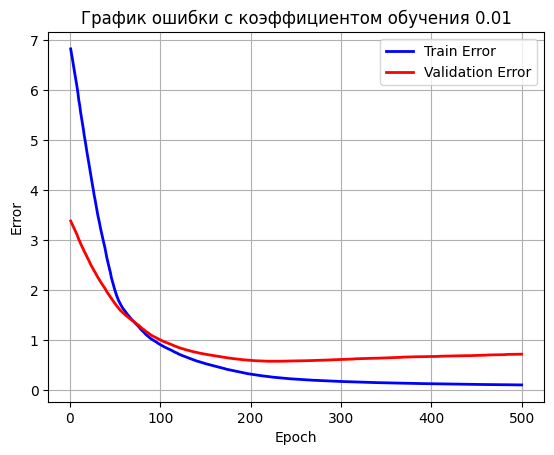

Train error: 0.09929169731370789 Validate error: 0.7139305618030032
Не получилось построить график функции


/tmp/ipykernel_49286/1700223597.py:62: RuntimeWarning: divide by zero encountered in log
  j = (y_array - one_column) * np.log(one_column - h) - y_array * np.log(h)
/tmp/ipykernel_49286/1700223597.py:62: RuntimeWarning: invalid value encountered in multiply
  j = (y_array - one_column) * np.log(one_column - h) - y_array * np.log(h)


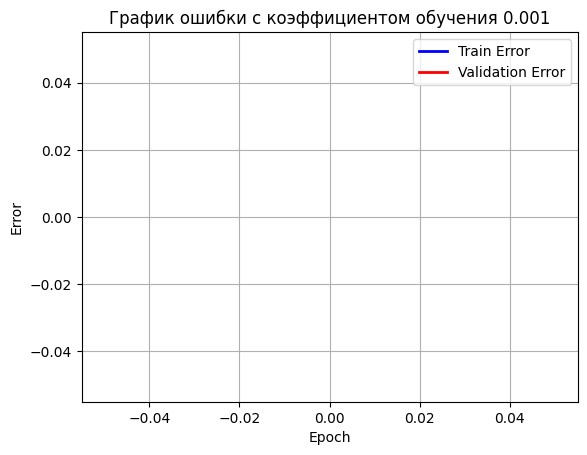

Train error: nan Validate error: nan
Не получилось построить график функции


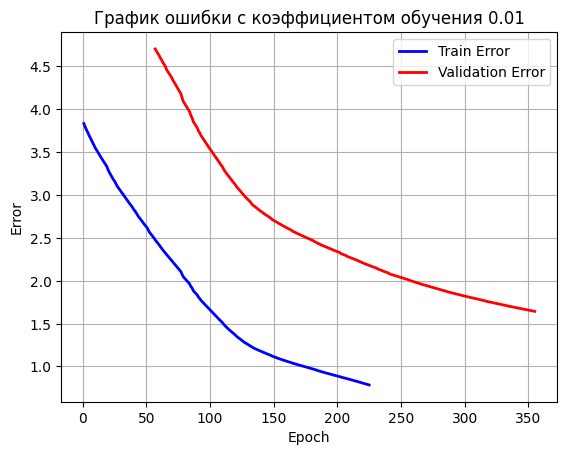

Train error: nan Validate error: nan
Не получилось построить график функции


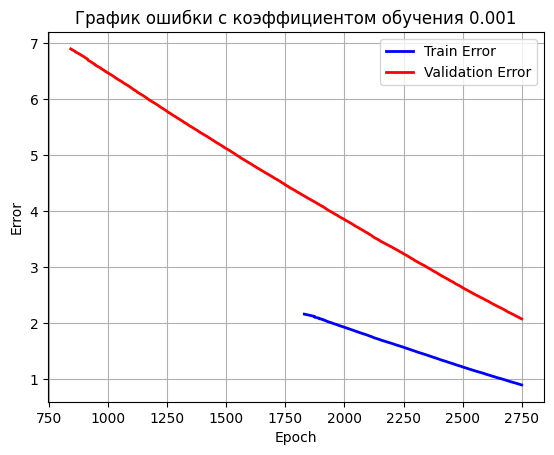

Train error: 0.8865430859900212 Validate error: 2.0670576614265004
Не получилось построить график функции


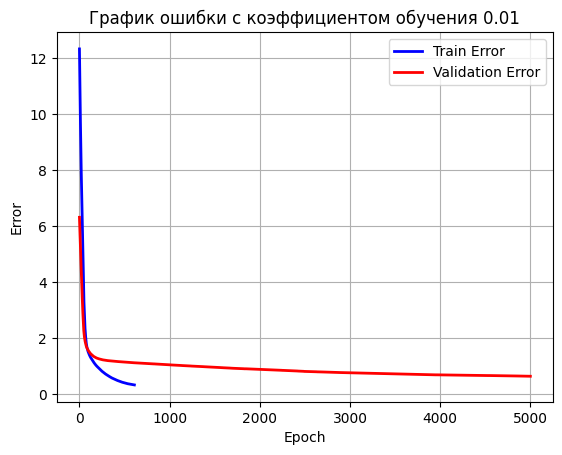

Train error: nan Validate error: 0.6480188709062078
Не получилось построить график функции


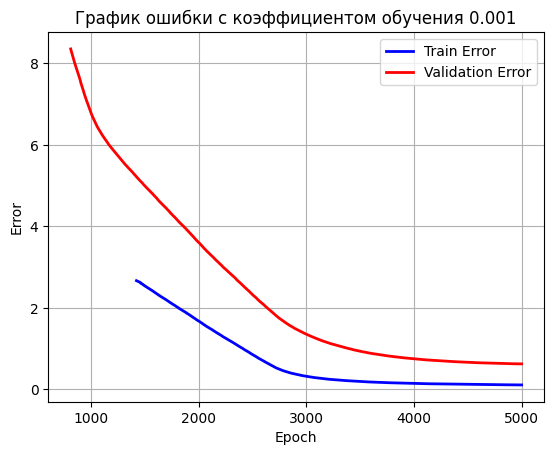

Train error: 0.10798449037374754 Validate error: 0.6245325537688544


In [10]:
X_extended = X_with_ones.copy()
X_extended = np.hstack((X_extended, (X_with_ones[:, 1] ** 2)[:, np.newaxis]))
X_extended = np.hstack((X_extended, (X_with_ones[:, 2] ** 2)[:, np.newaxis]))
X_extended = np.hstack((X_extended, (X_with_ones[:, 1] ** 3)[:, np.newaxis]))
X_extended = np.hstack((X_extended, (X_with_ones[:, 2] ** 3)[:, np.newaxis]))

X_train, y_train, X_validate, y_validate = split_data(X_extended, Y)

def calc3(t):
    x1, x2 = sp.symbols('x1 x2')
    expression = t[0] + t[1] * x1 + t[2] * x2 + t[3] * (x1 ** 2) + t[4] * (x2 ** 2) + t[5] * (x1 ** 3) + t[6] * (x2 ** 3)
    expr = sp.solve(expression, x2)
    return x1,x2,expr


learn_model_with_any_superparameters(X_train, y_train, X_validate, y_validate, calc3)